<a href="https://colab.research.google.com/github/Yuwin2008/Alaphabet-recognition/blob/main/Alphabet_recognition1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Importing libraries
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Uploading csv
from google.colab import files
uploader = files.upload()

Saving labels.csv to labels.csv


In [ ]:
#Uploading image
from google.colab import files
uploader2 = files.upload()

Saving image.npz to image.npz


In [ ]:
#Creating array
X = np.load("image.npz")["arr_0"]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y = pd.read_csv("labels.csv")['labels']
y

0        F
1        Z
2        U
3        Q
4        S
        ..
14295    Y
14296    U
14297    N
14298    V
14299    T
Name: labels, Length: 14300, dtype: object

In [ ]:
#Printing the Series
print(pd.Series(y).value_counts())

T    550
D    550
G    550
R    550
E    550
W    550
C    550
H    550
X    550
Y    550
J    550
F    550
V    550
O    550
P    550
I    550
Q    550
M    550
S    550
Z    550
K    550
U    550
N    550
A    550
L    550
B    550
Name: labels, dtype: int64


In [ ]:
#Creating classes
classes = ['A', 'B', 'C','D', 'E','F', 'G', 'H', 'I', 'J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
nclasses = len(classes)

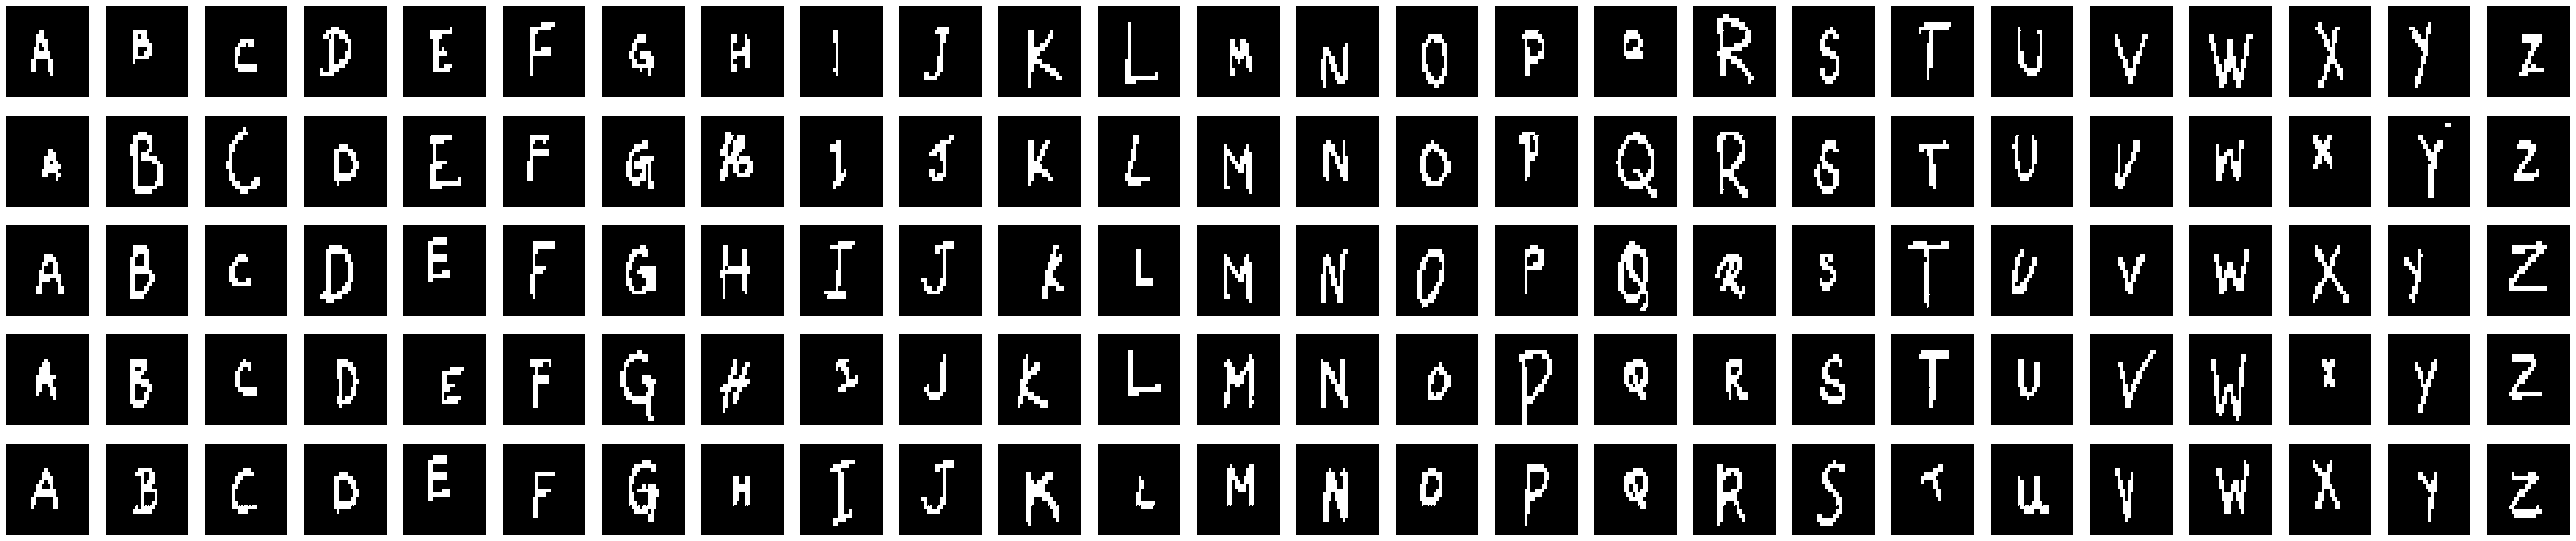

In [ ]:
#Printing the alphabets
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (22,30)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

In [ ]:
#Training the models
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,random_state = 26,train_size = 7500,test_size = 2500)
Xtrain_scaled = Xtrain/255.0
Xtest_scaled = Xtest/255.0 

In [ ]:
#Model
clf = LogisticRegression(solver='saga',multi_class='multinomial').fit(Xtrain_scaled,Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
#Presictiom
y_pred = clf.predict(Xtest_scaled)

In [ ]:
#Accuracy
accuracy = accuracy_score(Ytest,y_pred)
accuracy

0.9908

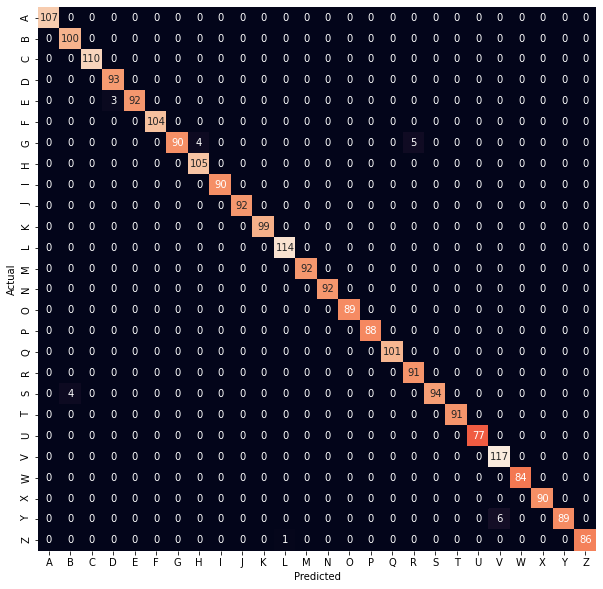

In [ ]:
#Confusion matrix
cm = pd.crosstab(Ytest, y_pred, rownames=['Actual'], colnames=['Predicted'])

p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)